In [1]:
# import library pandas, yaitu library untuk manipulasi dan analisis data
import pandas as pd

# baca semua data di file csv dan jadikan dataframe lalu tampilkan
dataset = pd.read_csv('student-mat.csv')
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [2]:
# tampilkan semua nama kolom dan tipe datanya
dataset.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [3]:
# laporan 1: persebaran alasan siswa memilih sekolah
# temukan alasan siswa memilih sekolah dan hitung banyak kemunculannya
apply_reason = dataset['reason'].value_counts().reset_index()
# ubah nama kolom lalu tampilkan laporan
apply_reason.columns = ['reason', 'count']
apply_reason

,reason,count
0,course,145
1,home,109
2,reputation,105
3,other,36


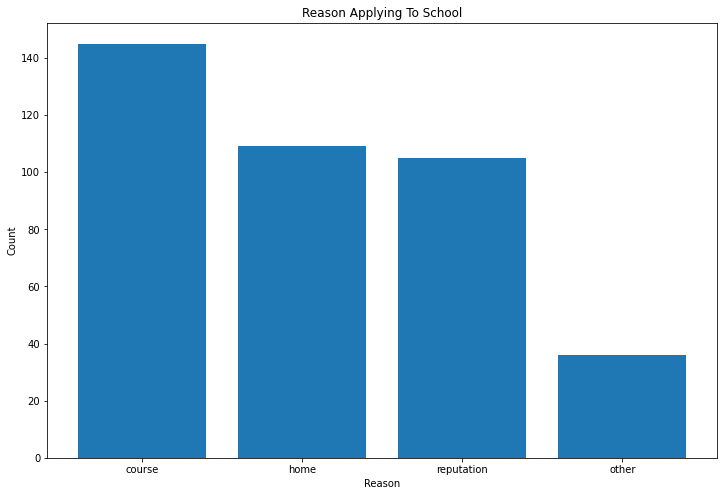

In [4]:
# visualisasi laporan 1
# import library untuk visualisasi data
import matplotlib.pyplot as plt

# menentukan ukuran visualisasi (panjang=12, lebar=8)
plt.figure(figsize=(12,8))
# visualisasi dengan bar chart dengan sumbu x=alasan, y=banyak siswa
plt.bar(apply_reason['reason'], apply_reason['count'])
# memberi judul visualisasi
plt.title('Reason Applying To School')
# memberi judul label sumbu x
plt.xlabel('Reason')
# memberi judul label sumbu y
plt.ylabel('Count')
# simpan visualisasi
plt.savefig('report_1.png')
# tampilkan visualisasi
plt.show()

In [5]:
# laporan 2: persebaran pendidikan terakhir orangtua, bagian ayah
# deklarasi nama kolom
columns = ['last_education_code', 'count']
# temukan pendidikan terakhir ayah dan hitung banyak kemunculannya
father_last_education = dataset['Fedu'].value_counts().reset_index()
# temukan pendidikan terakhir ibu dan hitung banyak kemunculannya
mother_last_education = dataset['Medu'].value_counts().reset_index()
# ubah nama kolom
father_last_education.columns = columns
mother_last_education.columns = columns
# deklarasi fungsi untuk mengubah angka menjadi string deskripsi sesuai ketentuan
fn = lambda x: 'None' if x == 0 else ('4th Grade' if x == 1 else ('5th - 9th Grade' if x == 2 else ('Secondary Education' if x == 3 else 'Higher Education')))
# ubah angka di last_education_code jadi string lalu simpan ke kolom last_education_description
father_last_education['last_education_description'] = father_last_education['last_education_code'].apply(fn)
mother_last_education['last_education_description'] = mother_last_education['last_education_code'].apply(fn)
# urutkan berdasar last_education_code lalu tampilkan
father_last_education = father_last_education.sort_values('last_education_code').reset_index().drop('index', 1)
father_last_education

,last_education_code,count,last_education_description
0,0,2,None
1,1,82,4th Grade
2,2,115,5th - 9th Grade
3,3,100,Secondary Education
4,4,96,Higher Education


In [6]:
# laporan 2: persebaran pendidikan terakhir orangtua, bagian ibu
# urutkan berdasar last_education_code lalu tampilkan
mother_last_education = mother_last_education.sort_values('last_education_code').reset_index().drop('index', 1)
mother_last_education

,last_education_code,count,last_education_description
0,0,3,None
1,1,59,4th Grade
2,2,103,5th - 9th Grade
3,3,99,Secondary Education
4,4,131,Higher Education


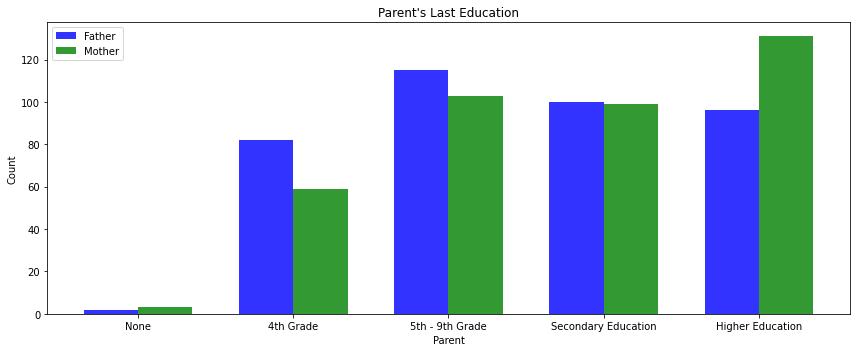

In [7]:
# visualisasi laporan 2
# import library numpy untuk mempermudah komputasi saintifik
import numpy as np

# menentukan ukuran visualisasi (panjang=12, lebar=5)
fig, ax = plt.subplots(figsize=(12,5))
# deklarasi banyak grup
n_groups = 5
# buat array dengan isi 0,1,2,3,4
index = np.arange(n_groups)
# deklarasi panjang bar
bar_width = 0.35
# deklarasi nilai opacity
opacity = 0.8
# deklarasi bar untuk pendidikan terakhir ayah (warna biru)
rects1 = plt.bar(index, father_last_education['count'], bar_width, alpha=opacity, color='b', label='Father')
# deklarasi bar untuk pendidikan terakhir ibu (warna hijau)
rects2 = plt.bar(index + bar_width, mother_last_education['count'], bar_width, alpha=opacity, color='g', label='Mother')
# memberi judul label sumbu x dan y
plt.xlabel('Parent')
plt.ylabel('Count')
# memberi judul label visualisasi
plt.title("Parent's Last Education")
# memberi nama dan menentukan posisi untuk detail bar
plt.xticks(index + bar_width/2, father_last_education['last_education_description'])
# memberi legenda terhadap visualisasi
plt.legend()
# membuat visualisasi tidak menyisakan banyak ruang putih di pinggir
plt.tight_layout()
# simpan visualisasi dan tampilkan
plt.savefig('report_2.png')
plt.show()

In [8]:
# laporan 3: persebaran pekerjaan orangtua, bagian ayah
# deklarasi nama kolom
columns = ['job', 'count']
# temukan pekerjaan ayah dan ibu lalu hitung banyak kemunculannya
father_job = dataset['Fjob'].value_counts().to_frame().reset_index()
mother_job = dataset['Mjob'].value_counts().to_frame().reset_index()
# ubah nama kolom
father_job.columns = columns
mother_job.columns = columns
# urutkan berdasar job lalu tampilkan
father_job = father_job.sort_values('job').reset_index().drop('index', 1)
mother_job = mother_job.sort_values('job').reset_index().drop('index', 1)
father_job

,job,count
0,at_home,20
1,health,18
2,other,217
3,services,111
4,teacher,29


In [9]:
# laporan 3: persebaran pekerjaan orangtua, bagian ibu
mother_job

,job,count
0,at_home,59
1,health,34
2,other,141
3,services,103
4,teacher,58


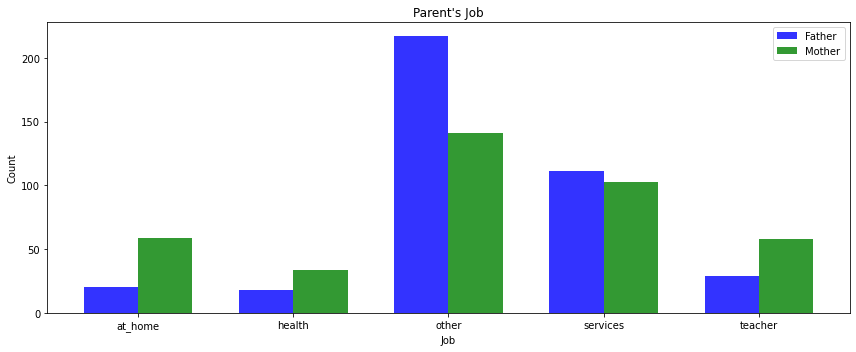

In [10]:
# visualisasi laporan 3
# menentukan ukuran visualisasi (panjang=12, lebar=5)
fig, ax = plt.subplots(figsize=(12,5))
# deklarasi banyak grup
n_groups = 5
# buat array dengan isi 0,1,2,3,4
index = np.arange(n_groups)
# deklarasi panjang bar
bar_width = 0.35
# deklarasi nilai opacity
opacity = 0.8
# deklarasi bar untuk pekerjaan ayah (warna biru) dan ibu (warna hijau)
rects1 = plt.bar(index, father_job['count'], bar_width, alpha=opacity, color='b', label='Father')
rects2 = plt.bar(index + bar_width, mother_job['count'], bar_width, alpha=opacity, color='g', label='Mother')
# memberi label judul sumbu x dan y, judul visualisai, memberi nama dan menentukan posisi untuk detail bar
plt.xlabel('Job')
plt.ylabel('Count')
plt.title("Parent's Job")
plt.xticks(index + bar_width/2, father_job['job'])
# memberi legenda, membuat visualisasi tidak menyisakan banyak ruang putih diluar, lalu simpan dan tampilkan
plt.legend()
plt.tight_layout()
plt.savefig('report_3.png')
plt.show()

In [11]:
# laporan 4: persebaran waktu belajar mandiri siswa dalam seminggu
study_time = dataset['studytime'].value_counts().reset_index()
study_time.columns = ['study_time_code', 'count']
fn = lambda x: '< 2 Hours' if x == 1 else ('2 - 5 Hours' if x == 2 else ('5 - 10 Hours' if x == 3 else '> 10 Hours'))
study_time['study_time'] = study_time['study_time_code'].apply(fn)
study_time = study_time.sort_values('study_time_code').reset_index().drop('index', 1)
study_time

,study_time_code,count,study_time
0,1,105,< 2 Hours
1,2,198,2 - 5 Hours
2,3,65,5 - 10 Hours
3,4,27,> 10 Hours


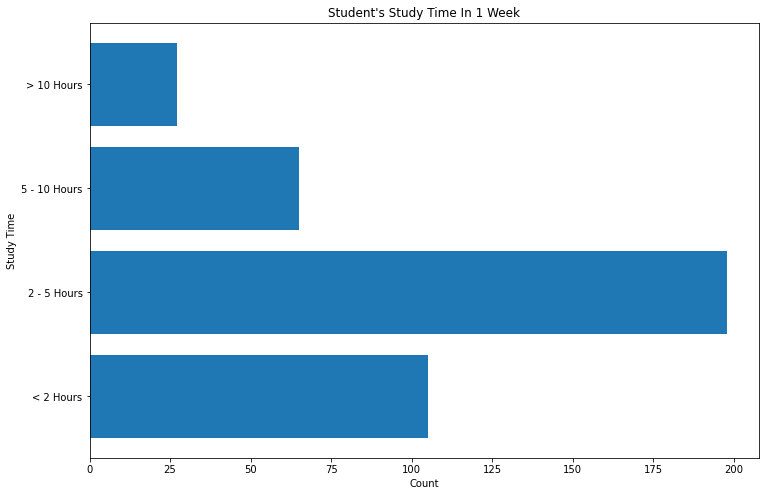

In [12]:
# visualisasi laporan 4
plt.figure(figsize=(12,8))
# visualisasi dengna bar chart horizontal
plt.barh(study_time['study_time'], study_time['count'])
plt.title("Student's Study Time In 1 Week")
plt.xlabel('Count')
plt.ylabel('Study Time')
plt.savefig('report_4.png')
plt.show()

In [13]:
# laporan 5: persebaran waktu perjalanan ke sekolah
travel_time = dataset['traveltime'].value_counts().reset_index()
travel_time.columns = ['travel_time_code', 'count']
fn = lambda x: '< 15 Mins' if x == 1 else ('15 - 30 Mins' if x == 2 else ('30 Mins - 1 Hour' if x == 3 else '> 1 Hour'))
travel_time['travel_time'] = travel_time['travel_time_code'].apply(fn)
travel_time = travel_time.sort_values('travel_time_code').reset_index().drop('index', 1)
travel_time

,travel_time_code,count,travel_time
0,1,257,< 15 Mins
1,2,107,15 - 30 Mins
2,3,23,30 Mins - 1 Hour
3,4,8,> 1 Hour


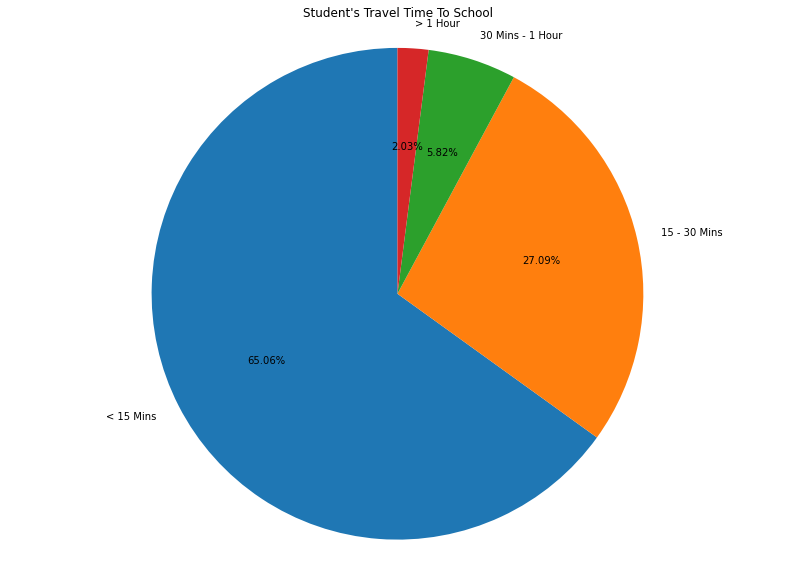

In [14]:
# visualisasi laporan 5
# deklarasi label untuk pie chart
pie_labels = travel_time['travel_time']
# deklaarasi untuk nilai tiap pie
tt_count = travel_time['count']
# menentukan ukuran visualisasi (panjang=14, lebar=10)
fig, ax = plt.subplots(figsize=(14,10))
# buat pie chart dengan nilai persentase 2 angka dibelakang koma dan dimulai dari 90 derajat
ax.pie(tt_count, labels=pie_labels, autopct='%1.2f%%', startangle=90)
ax.set_title("Student's Travel Time To School")
ax.axis('equal')
plt.savefig('report_5.png')
plt.show()

In [15]:
# laporan 6: persebaran umur laki - laki
data_male = dataset.loc[dataset['sex'] == 'M']
student_age_male = data_male['age'].value_counts().reset_index()
student_age_male.columns = ['age', 'count']
student_age_male

,age,count
0,16,50
1,15,44
2,17,40
3,18,39
4,19,10
5,20,2
6,22,1
7,21,1


In [16]:
# laporan 6: persebaran umur perempuan
data_female = dataset.loc[dataset['sex'] == 'F']
student_age_female = data_female['age'].value_counts().reset_index()
student_age_female.columns = ['age', 'count']
# samakan kolom age female dengan male menggunakan left join on='age' lalu hapus kolom count milik male dan isi nilai NaN dengan 0
student_age_female = pd.merge(student_age_male, student_age_female, how='left', on='age').drop('count_x', 1).fillna(0)
student_age_female.columns = ['age', 'count']
student_age_female

,age,count
0,16,54.0
1,15,38.0
2,17,58.0
3,18,43.0
4,19,14.0
5,20,1.0
6,22,0.0
7,21,0.0


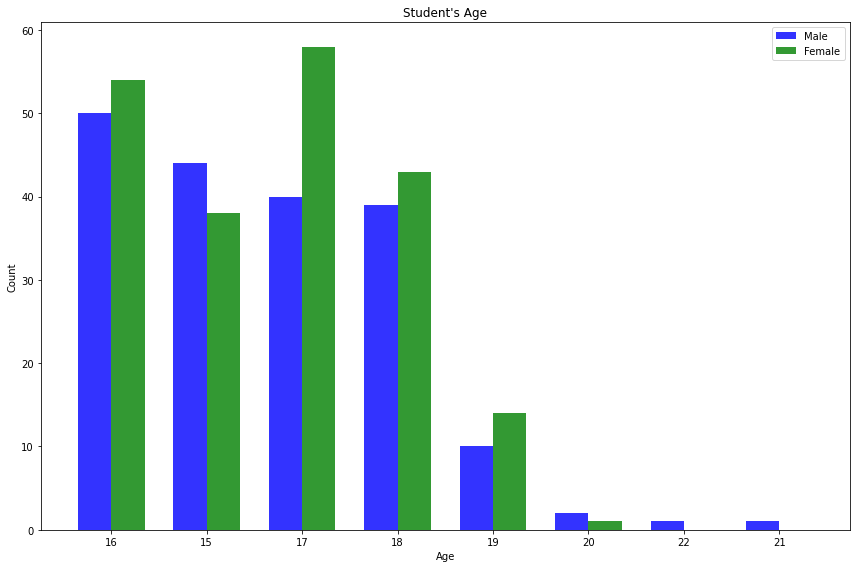

In [17]:
# visualisasi laporan 6
# menentukan ukuran visualisasi (panjang=12, lebar=8)
fig, ax = plt.subplots(figsize=(12,8))
# deklarasi banyak grup
n_groups = len(dataset['age'].value_counts().index)
# buat array dengan isi 0 sampai len() - 1
index = np.arange(n_groups)
# deklarasi panjang bar
bar_width = 0.35
# deklarasi nilai opacity
opacity = 0.8
# deklarasi bar untuk rata - rata nilai ulangan laki - laki (warna biru) dan perempuan (warna hijau)
rects1 = plt.bar(index, student_age_male['count'], bar_width, alpha=opacity, color='b', label='Male')
rects2 = plt.bar(index + bar_width, student_age_female['count'], bar_width, alpha=opacity, color='g', label='Female')
# memberi label judul sumbu x dan y, judul visualisai, memberi nama dan menentukan posisi untuk detail bar
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Student's Age")
plt.xticks(index + bar_width/2, student_age_male['age'])
# memberi legenda, membuat visualisasi tidak menyisakan banyak ruang putih diluar, lalu simpan dan tampilkan
plt.legend()
plt.tight_layout()
plt.savefig('report_6.png')
plt.show()

In [18]:
# laporan 7: rata - rata nilai tiap ulangan laki - laki
# ambil rata - rata tiap ulangan (g1, g2, dan g3)
g1_mean_male = data_male['G1'].mean()
g2_mean_male = data_male['G2'].mean()
g3_mean_male = data_male['G3'].mean()
# buat list rata - rata tiap ulangan
exam_data_male = [['G1', g1_mean_male], ['G2', g2_mean_male], ['G3', g3_mean_male]]
# jadikan list sebagai DataFrame lalu tampilkan
exam_data_frame_male =  pd.DataFrame(exam_data_male, columns=['exam', 'average_score'])
exam_data_frame_male

,exam,average_score
0,G1,11.229947
1,G2,11.074866
2,G3,10.914439


In [19]:
# laporan 7: rata - rata nilai tiap ulangan perempuan
# ambil rata - rata tiap ulangan (g1, g2, dan g3)
g1_mean_female = data_female['G1'].mean()
g2_mean_female = data_female['G2'].mean()
g3_mean_female = data_female['G3'].mean()
# buat list rata - rata tiap ulangan
exam_data_female = [['G1', g1_mean_female], ['G2', g2_mean_female], ['G3', g3_mean_female]]
# jadikan list sebagai DataFrame lalu tampilkan
exam_data_frame_female =  pd.DataFrame(exam_data_female, columns=['exam', 'average_score'])
exam_data_frame_female

,exam,average_score
0,G1,10.620192
1,G2,10.389423
2,G3,9.966346


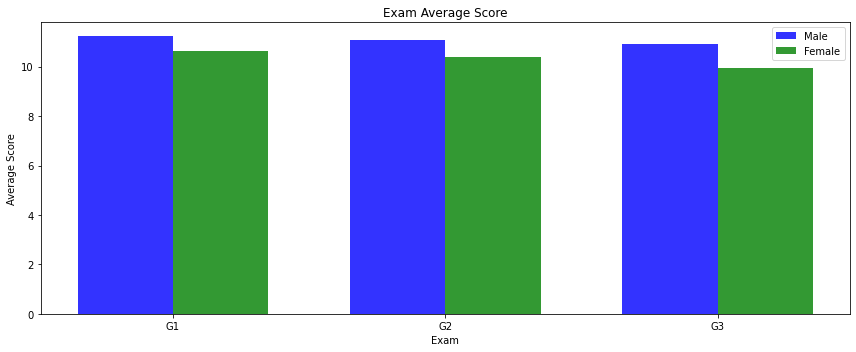

In [20]:
# visualisasi laporan 7 menggunakan bar chart
# menentukan ukuran visualisasi (panjang=12, lebar=5)
fig, ax = plt.subplots(figsize=(12,5))
# deklarasi banyak grup
n_groups = 3
# buat array dengan isi 0,1,2
index = np.arange(n_groups)
# deklarasi panjang bar
bar_width = 0.35
# deklarasi nilai opacity
opacity = 0.8
# deklarasi bar untuk rata - rata nilai ulangan laki - laki (warna biru) dan perempuan (warna hijau)
rects1 = plt.bar(index, exam_data_frame_male['average_score'], bar_width, alpha=opacity, color='b', label='Male')
rects2 = plt.bar(index + bar_width, exam_data_frame_female['average_score'], bar_width, alpha=opacity, color='g', label='Female')
# memberi label judul sumbu x dan y, judul visualisai, memberi nama dan menentukan posisi untuk detail bar
plt.xlabel('Exam')
plt.ylabel('Average Score')
plt.title("Exam Average Score")
plt.xticks(index + bar_width/2, exam_data_frame_male['exam'])
# memberi legenda, membuat visualisasi tidak menyisakan banyak ruang putih diluar, lalu simpan dan tampilkan
plt.legend()
plt.tight_layout()
plt.savefig('report_7.png')
plt.show()